In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import funciones as fs
from statsmodels.stats.proportion import proportions_ztest

%matplotlib inline

In [2]:
df_finaldemo = pd.read_csv("df_final_demo.csv")
df_finaldemo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [3]:
df_pt1 = pd.read_csv("df_final_web_data_pt_1.csv")
df_pt1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [4]:
df_pt2 = pd.read_csv("df_final_web_data_pt_2.csv")
df_pt2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [5]:
df_webdata = pd.concat([df_pt1, df_pt2], axis=0, ignore_index = True)
df_webdata

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [6]:
df_experiment = pd.read_csv("df_final_experiment_clients.csv")
df_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [7]:
df_experiment['client_id'].nunique()

70609

In [8]:
df_finaldemo = pd.read_csv('finaldemo.csv')

df_webdata = pd.read_csv('finalweb.csv')

In [9]:
df_perfil_exp = pd.merge(df_finaldemo, df_experiment, on='client_id', how='inner')
df_perfil_exp.head()

,client_id,tenure_year,tenure_month,age,gender,num_accounts,bal,calls_6_mnth,logons_6_mnth,age_category,tenure_category,Variation
0,836976,6.0,73.0,60.0,U,2.0,45105.30,6.0,9.0,Adult,Intermediate,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Adult,Intermediate,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Young Adult,New,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Adult,Long Term,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Young Adult,Long Term,Control


In [10]:
df_master_0 = pd.merge(df_webdata, df_perfil_exp, on='client_id', how='inner')
df_master_0.head()

,client_id,visitor_id,visit_id,process_step,date_time,next_time,duracion,step_number,paso_sig,check_error,...,tenure_month,age,gender,num_accounts,bal,calls_6_mnth,logons_6_mnth,age_category,tenure_category,Variation
0,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,2017-04-12 20:19:45,9.0,0,1.0,False,...,262.0,48.0,M,2.0,501570.72,4.0,4.0,Adult,Veteran,NaN
1,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,2017-04-12 20:20:31,46.0,1,2.0,False,...,262.0,48.0,M,2.0,501570.72,4.0,4.0,Adult,Veteran,NaN
2,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,2017-04-12 20:22:05,94.0,2,3.0,False,...,262.0,48.0,M,2.0,501570.72,4.0,4.0,Adult,Veteran,NaN
3,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,2017-04-12 20:23:09,64.0,3,NaN,False,...,262.0,48.0,M,2.0,501570.72,4.0,4.0,Adult,Veteran,NaN
4,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,2017-04-15 12:58:03,7.0,0,1.0,False,...,46.0,30.0,U,2.0,25454.66,2.0,6.0,Young Adult,New,Test


In [11]:
df_master_0.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'next_time', 'duracion', 'step_number', 'paso_sig', 'check_error',
       'tenure_year', 'tenure_month', 'age', 'gender', 'num_accounts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'age_category', 'tenure_category',
       'Variation'],
      dtype='object')

In [12]:
df_master_0 = df_master_0.rename(columns={'Variation': 'variation'})
columnas_mantener = ['client_id', 'variation', 'bal', 'age_category', 'tenure_category', 'process_step', 'paso_sig', 'step_number', 'check_error']

df_master = df_master_0[columnas_mantener].copy()
df_master

,client_id,variation,bal,age_category,tenure_category,process_step,paso_sig,step_number,check_error
0,169,NaN,501570.72,Adult,Veteran,start,1.0,0,False
1,169,NaN,501570.72,Adult,Veteran,step_1,2.0,1,False
2,169,NaN,501570.72,Adult,Veteran,step_2,3.0,2,False
3,169,NaN,501570.72,Adult,Veteran,step_3,NaN,3,False
4,555,Test,25454.66,Young Adult,New,start,1.0,0,False
...,...,...,...,...,...,...,...,...,...
379217,9999839,NaN,67425.35,Young Adult,Long Term,start,0.0,0,False
379218,9999839,NaN,67425.35,Young Adult,Long Term,start,1.0,0,False
379219,9999839,NaN,67425.35,Young Adult,Long Term,step_1,2.0,1,False
379220,9999839,NaN,67425.35,Young Adult,Long Term,step_2,3.0,2,False


In [33]:
#df_master.to_csv('df_master_clean.csv')

H4: Los clientes con mayor antigüedad en Vanguard (categoría "Veteran") presentan una mayor tasa de finalización en el diseño antiguo (Control) que en el nuevo (Test).

* $H_0$ (Hipótesis Nula): $P_{control} \leq P_{test}$

* $H_1$ (Hipótesis Alternativa): $P_{control} > P_{test}$

In [13]:
df_master = pd.read_csv('df_master_clean.csv', index_col=0)

In [14]:
df_vets = df_master[df_master['tenure_category'] == 'Veteran'].copy()

In [15]:
df_h4_control = df_vets[df_vets['variation'] == 'Control']
df_h4_test = df_vets[df_vets['variation'] == 'Test']

In [16]:
confirm_control = df_h4_control[df_h4_control['process_step'] == 'confirm']['client_id'].nunique()
total_veteranos_control = df_h4_control['client_id'].nunique()

print(confirm_control)
print(total_veteranos_control)

571
3002


In [17]:
confirm_test = df_h4_test[df_h4_test['process_step'] == 'confirm']['client_id'].nunique()
total_veteranos_test = df_h4_test['client_id'].nunique()

print(confirm_test)
print(total_veteranos_test)

807
3523


In [18]:
# 1. Filtramos por veteranos y miramos cuántos no tienen variación asignada
#vets_sin_variacion = df_master[(df_master['tenure_category'] == 'Veteran') & (df_master['variation'].isna())]

# 2. Contamos cuántos clientes únicos son
#num_vets_sin_var = vets_sin_variacion['client_id'].nunique()

#print(f"Número de veteranos sin variación asociada: {num_vets_sin_var}")

In [19]:
rate_control = confirm_control / total_veteranos_control *100
rate_test = confirm_test / total_veteranos_test *100

print(f"Tasa de finalización Veteran - Control: {rate_control: .2f}")
print(f"Tasa de finalización Veteran - Test: {rate_test: .2f}")

Tasa de finalización Veteran - Control:  19.02
Tasa de finalización Veteran - Test:  22.91


In [20]:
summary_h4 = pd.DataFrame({
    "group": ["Control", "Test"],
    "completed": [confirm_control, confirm_test],
    "total": [total_veteranos_control, total_veteranos_test]})

summary_h4["completion_rate"] = summary_h4["completed"] / summary_h4["total"]
summary_h4

,group,completed,total,completion_rate
0,Control,571,3002,0.190207
1,Test,807,3523,0.229066


<Axes: xlabel='group', ylabel='completion_rate'>

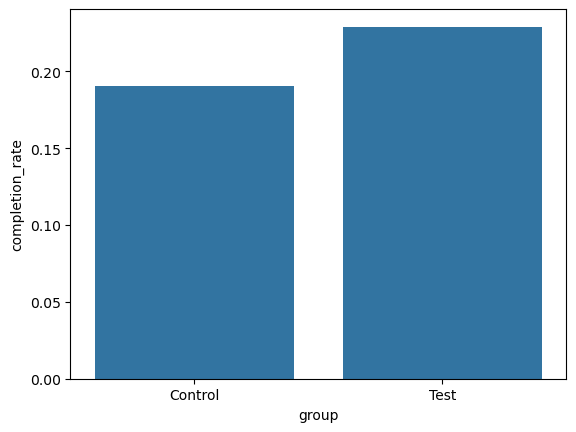

In [21]:
sns.barplot(data=summary_h4, x='group', y='completion_rate')

Realizamos un z-test de proporciones:

In [22]:
count = np.array([confirm_control, confirm_test])
nobs = np.array([total_veteranos_control, total_veteranos_test])

z_stat, p_value = proportions_ztest(count, nobs, alternative="larger")

print(f"Z statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")


Z statistic: -3.8331
P-value: 0.9999


p-value: 0.99 > 0.05. 
No se rechaza la hipótesis nula por lo que juntamente con el estadístico Z de -3.83 y la comparación de tasas de finalización (19.02% vs 22.91%), demuestran que el diseño Test supera al Control. Por lo que, nuestra sospecha inicial de que los veteranos preferirían el diseño antiguo se rechaza, confirmando que el nuevo diseño es más efectivo incluso para los usuarios de más antigüedad.

Se ha utilizado un z-test de proporciones porque la variable analizada es la tasa de finalización, que mide proporciones entre dos grupos independientes (Control y Test). Este test es adecuado para experimentos A/B con muestras grandes y no requiere de comprobaciones de normalidad debido al Teorema del Límite Central.

Un t-test sería más adecuado para variables continuas y asume normalidad en la distribución. Dado que las tasas derivan de datos categóricos, el z-test de proporciones nos ha sido útil para evaluar diferencias en las proporciones observadas entre los grupos.

---

H5: Los clientes con balances altos presentan una tasa de finalización menor en el grupo Test que en el grupo Control.

* $H_0$ (Hipótesis Nula): $P_{test} \geq P_{control}$

* $H_1$ (Hipótesis Alternativa): $P_{test} < P_{control}$

In [23]:
limite_balance = df_master['bal'].quantile(0.75)

print(f"Los clientes VIP son los que tienen más de: {limite_balance: 2f}")

Los clientes VIP son los que tienen más de:  151629.270000


In [24]:
df_h5 = df_master[df_master['bal'] >= limite_balance].copy()

In [25]:
df_h5_control = df_h5[df_h5['variation'] == 'Control']
df_h5_test = df_h5[df_h5['variation'] == 'Test']

In [26]:
confirm_control_h5 = df_h5_control[df_h5_control['process_step'] == 'confirm']['client_id'].nunique()
total_vip_control_h5 = df_h5_control['client_id'].nunique()

print(confirm_control_h5)
print(total_vip_control_h5)

905
5012


In [27]:
confirm_test_h5 = df_h5_test[df_h5_test['process_step'] == 'confirm']['client_id'].nunique()
total_vip_test_h5 = df_h5_test['client_id'].nunique()

print(confirm_test_h5)
print(total_vip_test_h5)

1284
5900


In [28]:
rate_control_h5 = confirm_control_h5 / total_vip_control_h5 *100
rate_test_h5 = confirm_test_h5 / total_vip_test_h5 *100

print(f"Tasa de finalización VIP - Control: {rate_control_h5: .2f}")
print(f"Tasa de finalización VIP - Test: {rate_test_h5: .2f}")

Tasa de finalización VIP - Control:  18.06
Tasa de finalización VIP - Test:  21.76


In [29]:
summary_h5 = pd.DataFrame({
    "group": ["Test", "Control"],
    "completed": [confirm_test_h5, confirm_control_h5],
    "total": [total_vip_test_h5, total_vip_control_h5]})

summary_h5["completion_rate"] = summary_h5["completed"] / summary_h5["total"]
summary_h5

,group,completed,total,completion_rate
0,Test,1284,5900,0.217627
1,Control,905,5012,0.180567


<Axes: xlabel='group', ylabel='completion_rate'>

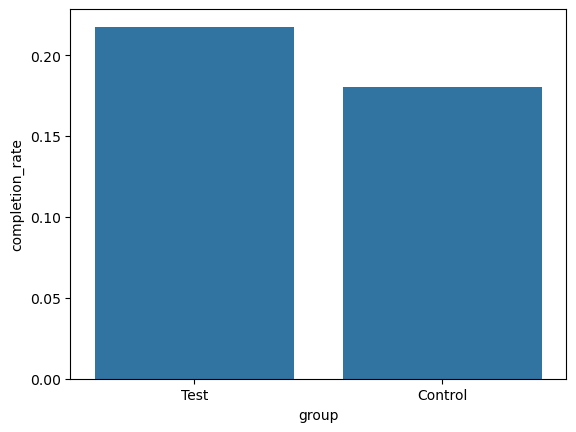

In [30]:
sns.barplot(data=summary_h5, x='group', y='completion_rate')

In [31]:
count_h5 = np.array([confirm_test_h5, confirm_control_h5])
nobs_h5 = np.array([total_vip_test_h5, total_vip_control_h5])

z_stat_h5, p_value_h5 = proportions_ztest(count_h5, nobs_h5, alternative="smaller")

print(f"Z statistic: {z_stat_h5:.4f}")
print(f"P-value: {p_value_h5:.4f}")

Z statistic: 4.8177
P-value: 1.0000


p-value 1.00 > 0.05. No se rechaza la hipótesis nula, lo que, sumado al estadístico Z de 4.81 y la comparación de tasas (Control: 18.06% vs Test: 21.76%), demuestra que el diseño Test también supera al Control en el segmento VIP. Nuestra sospecha de que los clientes con balances altos preferirían el diseño antiguo se rechaza, confirmando que el nuevo sistema es más efectivo incluso para usuarios con mayores activos.